In [8]:
# 导入第三方模块
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import linear_model

# 读取数据
bchc = pd.read_csv(r'D:\Fourth_year_in_ICCAS\Glow_discharge\Machine_learning2\logistic_regration.csv')
# 提取出所有自变量名称
bchc.y = bchc.y.map({'HC':0,'BC':1})
predictors = bchc.columns[1:]
# 构建自变量矩阵
X = bchc.loc[:,predictors]
# 提取y变量值
y = bchc.y
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 72)

# 利用训练集建模
sklearn_logistic = linear_model.LogisticRegression()
sklearn_logistic.fit(X_train, y_train)
# 返回模型的各个参数
print(sklearn_logistic.intercept_, sklearn_logistic.coef_)

[-1.64221023] [[ 0.14271272 -0.28348803 -0.39766339 -0.28673161  0.15450253  0.90491448
   0.24658198 -0.45375066  0.04887779  0.43146926  0.35315679 -0.20809703
   0.46905986 -0.41370996 -0.20598236 -0.03012535 -0.08001971 -0.17204395
  -0.21640544 -0.0691056  -0.38178085  0.08165655 -0.30735208 -0.55861508
  -0.62999846 -0.12673045 -0.18441954 -0.25990155  0.38282849  0.24089595
   0.43637083 -0.75717296 -0.69385554 -0.08018816 -0.01083189  0.03254016
  -0.25659238  0.98730094 -0.13290932  0.35958749  0.41332241 -0.13969334
  -0.43193584 -0.73308726  0.28779862  0.75066824 -0.20445155]]


E:\pathway for English app only\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# 模型预测
sklearn_predict = sklearn_logistic.predict(X_test)
# 预测结果统计
pd.Series(sklearn_predict).value_counts()

1    23
0    22
dtype: int64

In [10]:
# 导入第三方模块
from sklearn import metrics
from pandas.plotting import scatter_matrix

# 混淆矩阵
cm = metrics.confusion_matrix(y_test, sklearn_predict, labels = [0,1])
cm

array([[19,  3],
       [ 3, 20]], dtype=int64)

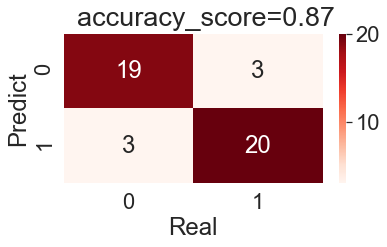

模型的准确率为：
 0.8666666666666667
模型的评估报告：
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.87      0.87      0.87        23

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



In [11]:
# 混淆矩阵的可视化
# 导入第三方模块
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib 弹窗绘图
# 绘制热力图
sns.set(font_scale=2)
# 绘制混淆矩阵图
sns.heatmap(cm, annot = True, cmap = 'Reds', fmt = 'd')
# 去除x轴和y轴标签
plt.xlabel('Real')
plt.ylabel('Predict')
plt.text(0.1,-0.1,'accuracy_score=%.2f'%(metrics.accuracy_score(y_test, sklearn_predict)) , fontsize=27)
# 显示图形和保存
plt.tight_layout() #解决导出后显示不全的问题
plt.savefig('D:\Fourth_year_in_ICCAS\Glow_discharge\Machine_learning2\Logistic_regration_matrix.tif',transparent = True, dpi=600)
plt.show()
print('模型的准确率为：\n',metrics.accuracy_score(y_test, sklearn_predict))
print('模型的评估报告：\n',metrics.classification_report(y_test,sklearn_predict))

In [12]:
sklearn_logistic.predict_proba(X_test)

array([[6.23640491e-05, 9.99937636e-01],
       [9.79323706e-01, 2.06762942e-02],
       [4.66778025e-05, 9.99953322e-01],
       [5.79593043e-04, 9.99420407e-01],
       [9.99762952e-01, 2.37047860e-04],
       [3.18618501e-01, 6.81381499e-01],
       [9.34217319e-01, 6.57826806e-02],
       [4.51988025e-09, 9.99999995e-01],
       [1.23689301e-02, 9.87631070e-01],
       [9.95897979e-01, 4.10202140e-03],
       [9.92592025e-01, 7.40797501e-03],
       [8.99331386e-01, 1.00668614e-01],
       [7.39810456e-03, 9.92601895e-01],
       [1.02140518e-14, 1.00000000e+00],
       [1.28371043e-01, 8.71628957e-01],
       [1.26917366e-10, 1.00000000e+00],
       [4.16608641e-03, 9.95833914e-01],
       [9.10178867e-01, 8.98211327e-02],
       [1.09858906e-01, 8.90141094e-01],
       [1.93587554e-01, 8.06412446e-01],
       [9.73710312e-01, 2.62896881e-02],
       [4.99328045e-06, 9.99995007e-01],
       [9.99786071e-01, 2.13929123e-04],
       [9.42640892e-01, 5.73591083e-02],
       [9.575675

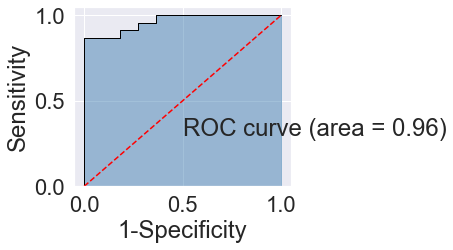

In [13]:
# y得分为模型预测正例的概率
y_score = sklearn_logistic.predict_proba(X_test)[:,1]
# 计算不同阈值下，fpr和tpr的组合值，其中fpr表示1-Specificity，tpr表示Sensitivity
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.tight_layout() #解决导出后显示不全的问题
# 显示图形
plt.show()

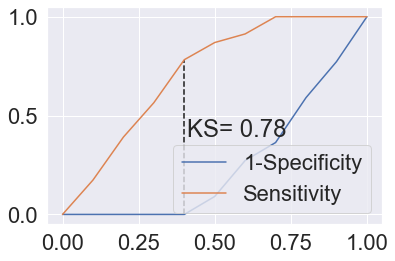

In [14]:
# 调用自定义函数，绘制K-S曲线
plot_ks(y_test = y_test, y_score = y_score, positive_flag = 1)

In [29]:
# -----------------------第一步 建模 ----------------------- #
# 导入第三方模块
import statsmodels.api as sm
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 1234)
# 为训练集和测试集的X矩阵添加常数列1
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)
# 拟合Logistic模型
sm_logistic = sm.Logit(y_train, X_train2).fit()
# 返回模型的参数
sm_logistic.params

E:\pathway for English app only\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
E:\pathway for English app only\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
# -----------------------第二步 预测构建混淆矩阵 ----------------------- #
# 模型在测试集上的预测
sm_y_probability = sm_logistic.predict(X_test2)
# 根据概率值，将观测进行分类，以0.5作为阈值
sm_pred_y = np.where(sm_y_probability >= 0.5, 1, 0)
# 混淆矩阵
cm = metrics.confusion_matrix(y_test, sm_pred_y, labels = [0,1])
cm

In [ ]:
# -----------------------第三步 绘制ROC曲线 ----------------------- #
# 计算真正率和假正率 
fpr,tpr,threshold = metrics.roc_curve(y_test, sm_y_probability)
# 计算auc的值  
roc_auc = metrics.auc(fpr,tpr)
# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

In [ ]:
# -----------------------第四步 绘制K-S曲线 ----------------------- #
# 调用自定义函数，绘制K-S曲线
sm_y_probability.index = np.arange(len(sm_y_probability))
plot_ks(y_test = y_test, y_score = sm_y_probability, positive_flag = 1)